In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import make_blobs
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, cophenet

markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'H', 'x', '+', '<', '>', '1', '2', '3', '4']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

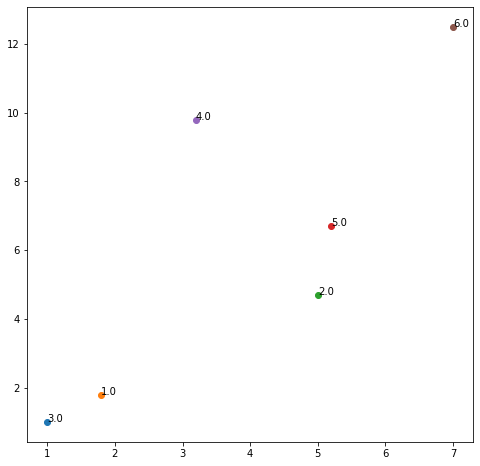

In [6]:
# initialize list elements 
data = [[1,   1 , 3],
        [1.8, 1.8,  1],
        [5.0, 4.7,2],
        [5.2, 6.7,5],
        [3.2, 9.8,4],
        [7, 12.5, 6],
        
        ] 
  
df = pd.DataFrame(data, columns=['x', 'y', "num"]) 
fig, ax = plt.subplots(figsize=(8, 8))
for index, row in df.iterrows():
    ax.scatter(row["x"],row["y"])#, marker=markers[df["Grupo"]%len(markers)], color=colors[df["Grupo"]%len(colors)]
    ax.annotate(str(row["num"]), (row["x"],row["y"]))
plt.show()

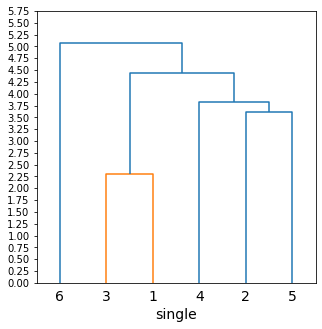

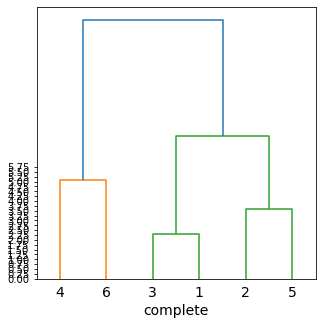

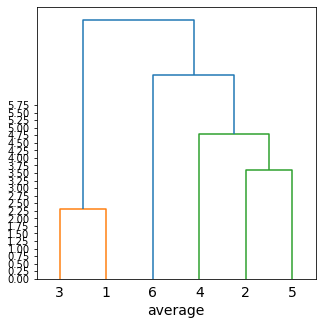

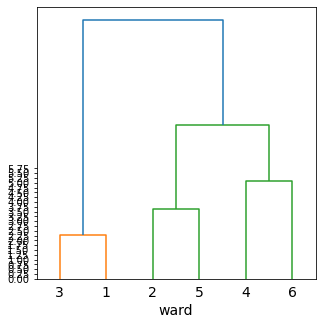

In [7]:
for m in ['single', 'complete', 'average', 'ward']:
    dm = pdist(df, metric='euclidean') #single, complete, average, and ward
    Z = linkage(dm, method=m)#single, complete, average, and ward
    fig, ax = plt.subplots(figsize=(5, 5))
    d = dendrogram(Z, labels=list(df['num']), show_leaf_counts=True, leaf_font_size=14, ax=ax)
    ax.set_xlabel(m, fontsize=14)
    ax.set_yticks(np.arange(0, 6, 0.25))

    plt.show()

In [8]:
#usar en conjunto con silhouette score 
cpc, cp = cophenet(linkage(dm, method='ward'), dm)
print('CPC Ward\'s linkage: {:.3f}'.format(cpc))

cpc, cp = cophenet(linkage(dm, method='single'), dm)
print('CPC Single linkage: {:.3f}'.format(cpc))

cpc, cp = cophenet(linkage(dm, method='complete'), dm)
print('CPC Complete linkage: {:.3f}'.format(cpc))

cpc, cp = cophenet(linkage(dm, method='average'), dm)
print('CPC Average linkage: {:.3f}'.format(cpc))

CPC Ward's linkage: 0.635
CPC Single linkage: 0.672
CPC Complete linkage: 0.638
CPC Average linkage: 0.661
